##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE234129**

file previously downloaded:
* GSE234129_barcodes.tsv.gz  
* GSE234129_count_matrix.mtx.gz  
* GSE234129_features.tsv.gz  
* GSE234129_meta.tsv.gz

##### renamed barcodes, features, and matrix files for import. 
##### unzipped the meta file with gunzip
##### dataset meant to contain data from 6 patients (some primary, mets, and blood), will need metadata file to seperate out samples/patients
                    


In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE234129')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE234129"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [8]:
#load all datasets
GAC.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE234129/GAC", gene.column=1)


In [9]:
head(colnames(GAC.data))

[1] "GACCTGGTCATACGGT_Ca0106-5" "TGGTTCCGTGTGACCC_Ca0106-5"
[3] "CCCTCCTGTAAAGGAG_Ca0327"   "GGCCGATAGGTCGGAT_Ca0327"  
[5] "CGCTTCAGTTACCGAT_FS0110-5" "GGGCATCAGCGTTTAC_FS0110-5"

In [10]:
meta <- read.csv("GSE234129_meta.tsv", sep = "\t")

In [11]:
head(meta)

cell_barcodes             patient sample     celltype
1 GACCTGGTCATACGGT_Ca0106-5 MDA_Pt2 MDA_Pt2-Ca DNT     
2 TGGTTCCGTGTGACCC_Ca0106-5 MDA_Pt2 MDA_Pt2-Ca CD8_C7  
3 CCCTCCTGTAAAGGAG_Ca0327   MDA_Pt9 MDA_Pt9-Ca CD8_C2  
4 GGCCGATAGGTCGGAT_Ca0327   MDA_Pt9 MDA_Pt9-Ca CD8_C0  
5 CGCTTCAGTTACCGAT_FS0110-5 MDA_Pt2 MDA_Pt2-As NK_C3   
6 GGGCATCAGCGTTTAC_FS0110-5 MDA_Pt2 MDA_Pt2-As CD8_C0

In [12]:
#create seperate seurat object for each sample
GAC <- CreateSeuratObject(counts = GAC.data, project = "GSE234129", min.features = 200, meta.data = meta)

In [13]:
head(GAC)
tail(GAC)

orig.ident nCount_RNA nFeature_RNA
GACCTGGTCATACGGT_Ca0106-5 GSE234129   710        390        
TGGTTCCGTGTGACCC_Ca0106-5 GSE234129   726        437        
CCCTCCTGTAAAGGAG_Ca0327   GSE234129  2742       1466        
GGCCGATAGGTCGGAT_Ca0327   GSE234129   640        443        
CGCTTCAGTTACCGAT_FS0110-5 GSE234129  2254       1249        
GGGCATCAGCGTTTAC_FS0110-5 GSE234129  2535       1118        
ACGAGGAAGGATATAC_FS0221-5 GSE234129   969        581        
GATCGATGTTCGCTAA_FS0221-5 GSE234129  2855       1295        
GGACAGAGTCGATTGT_FS0221-5 GSE234129  1114        595        
TAGAGCTGTAAATACG_FS0221-5 GSE234129   635        429        
                          cell_barcodes             patient sample     celltype
GACCTGGTCATACGGT_Ca0106-5 GACCTGGTCATACGGT_Ca0106-5 MDA_Pt2 MDA_Pt2-Ca DNT     
TGGTTCCGTGTGACCC_Ca0106-5 TGGTTCCGTGTGACCC_Ca0106-5 MDA_Pt2 MDA_Pt2-Ca CD8_C7  
CCCTCCTGTAAAGGAG_Ca0327   CCCTCCTGTAAAGGAG_Ca0327   MDA_Pt9 MDA_Pt9-Ca CD8_C2  
GGCCGATAGGTCGGAT_Ca0327   GGCCGATAGGTCGGAT_Ca0327   MDA_Pt9 MDA_Pt9-Ca CD8_C0  
CGCTTCAGTTACCGAT_FS0110-5 CGCTTCAGTTACCGAT_FS0110-5 MDA_Pt2 MDA_Pt2-As NK_C3   
GGGCATCAGCGTTTAC_FS0110-5 GGGCATCAGCGTTTAC_FS0110-5 MDA_Pt2 MDA_Pt2-As CD8_C0  
ACGAGGAAGGATATAC_FS0221-5 ACGAGGAAGGATATAC_FS0221-5 MDA_Pt3 MDA_Pt3-As DNT     
GATCGATGTTCGCTAA_FS0221-5 GATCGATGTTCGCTAA_FS0221-5 MDA_Pt3 MDA_Pt3-As NKT     
GGACAGAGTCGATTGT_FS0221-5 GGACAGAGTCGATTGT_FS0221-5 MDA_Pt3 MDA_Pt3-As NKT     
TAGAGCTGTAAATACG_FS0221-5 TAGAGCTGTAAATACG_FS0221-5 MDA_Pt3 MDA_Pt3-As DNT

orig.ident nCount_RNA nFeature_RNA
TGTTCCGCACAGCCCA_FS0313   GSE234129   8893      2865        
TTGAACGTCCTGTACC_FS0313   GSE234129   9871      3042        
CAGAGAGAGTCTTGCA_LCZY0313 GSE234129   5488      1944        
TCTATTGGTACCATCA_LCZY0313 GSE234129    293       252        
TGCCAAAGTTGGAGGT_LCZY0313 GSE234129   3685      1463        
CGAGAAGTCGCCTGTT_M1-0327  GSE234129   1062       458        
CTGGTCTTCACTCTTA_M1-0327  GSE234129  10457      3206        
TGGCCAGAGGCATGTG_M1-0327  GSE234129  10047      3215        
ACGCAGCAGTGCGTGA_PBMC0313 GSE234129   6558      2435        
GAACCTACATCACAAC_PBMC0313 GSE234129   8905      2988        
                          cell_barcodes             patient sample      
TGTTCCGCACAGCCCA_FS0313   TGTTCCGCACAGCCCA_FS0313   MDA_Pt5 MDA_Pt5-As  
TTGAACGTCCTGTACC_FS0313   TTGAACGTCCTGTACC_FS0313   MDA_Pt5 MDA_Pt5-As  
CAGAGAGAGTCTTGCA_LCZY0313 CAGAGAGAGTCTTGCA_LCZY0313 MDA_Pt5 MDA_Pt5-Ov  
TCTATTGGTACCATCA_LCZY0313 TCTATTGGTACCATCA_LCZY0313 MDA_Pt5 MDA_Pt5-Ov  
TGCCAAAGTTGGAGGT_LCZY0313 TGCCAAAGTTGGAGGT_LCZY0313 MDA_Pt5 MDA_Pt5-Ov  
CGAGAAGTCGCCTGTT_M1-0327  CGAGAAGTCGCCTGTT_M1-0327  MDA_Pt9 MDA_Pt9-Li  
CTGGTCTTCACTCTTA_M1-0327  CTGGTCTTCACTCTTA_M1-0327  MDA_Pt9 MDA_Pt9-Li  
TGGCCAGAGGCATGTG_M1-0327  TGGCCAGAGGCATGTG_M1-0327  MDA_Pt9 MDA_Pt9-Li  
ACGCAGCAGTGCGTGA_PBMC0313 ACGCAGCAGTGCGTGA_PBMC0313 MDA_Pt5 MDA_Pt5-PBMC
GAACCTACATCACAAC_PBMC0313 GAACCTACATCACAAC_PBMC0313 MDA_Pt5 MDA_Pt5-PBMC
                          celltype 
TGTTCCGCACAGCCCA_FS0313   pDCs     
TTGAACGTCCTGTACC_FS0313   pDCs     
CAGAGAGAGTCTTGCA_LCZY0313 pDCs     
TCTATTGGTACCATCA_LCZY0313 Plasma_C1
TGCCAAAGTTGGAGGT_LCZY0313 pDCs     
CGAGAAGTCGCCTGTT_M1-0327  DNT      
CTGGTCTTCACTCTTA_M1-0327  pDCs     
TGGCCAGAGGCATGTG_M1-0327  pDCs     
ACGCAGCAGTGCGTGA_PBMC0313 pDCs     
GAACCTACATCACAAC_PBMC0313 pDCs

In [20]:
#Add dataset info to colnames
colnames(GAC) <- paste0("GSE234129_GAC_", colnames(GAC))

In [21]:
head(colnames(GAC))

[1] "GSE234129_GAC_GACCTGGTCATACGGT_Ca0106-5"
[2] "GSE234129_GAC_TGGTTCCGTGTGACCC_Ca0106-5"
[3] "GSE234129_GAC_CCCTCCTGTAAAGGAG_Ca0327"  
[4] "GSE234129_GAC_GGCCGATAGGTCGGAT_Ca0327"  
[5] "GSE234129_GAC_CGCTTCAGTTACCGAT_FS0110-5"
[6] "GSE234129_GAC_GGGCATCAGCGTTTAC_FS0110-5"

In [22]:
table(Idents(GAC))
table(GAC$sample)


GSE234129 
    19488 


  MDA_Pt1-Ad   MDA_Pt1-Ca   MDA_Pt2-As   MDA_Pt2-Ca   MDA_Pt2-PB   MDA_Pt3-As 
         131          538         1992         1056         1595         3111 
  MDA_Pt3-Ca   MDA_Pt4-As   MDA_Pt4-Ca   MDA_Pt5-Ad   MDA_Pt5-As   MDA_Pt5-Ca 
        1046          620          424          532         1693          777 
  MDA_Pt5-Ov MDA_Pt5-PBMC   MDA_Pt9-Ad   MDA_Pt9-Ca   MDA_Pt9-Li 
        1477         1615          495         1268         1118 

##### six patients (Pt1, Pt2, Pt3, Pt4, Pt5, Pt9)

##### above metadata means the following:
* Ad --> Adjacent normal tissue --> KEEP
* Ca --> primary tumour --> KEEP
* As --> malignant ascites --> REMOVE
* PB --> PBMC (blood) --> REMOVE
* Ov --> ovarian metastasis --> KEEP
* PBMC --> PBMC (blood) --> REMOVE
* Li --> liver metastasis --> KEEP

In [23]:
#subsetting out wanted tissues and separating samples into seperate seurat objects in order to add meta_data
Pt1_Ad <- subset(x = GAC, subset = sample == "MDA_Pt1-Ad")
Pt1_Ca <- subset(x = GAC, subset = sample == "MDA_Pt1-Ca")
Pt2_Ca <- subset(x = GAC, subset = sample == "MDA_Pt2-Ca")
Pt3_Ca <- subset(x = GAC, subset = sample == "MDA_Pt3-Ca")
Pt4_Ca <- subset(x = GAC, subset = sample == "MDA_Pt4-Ca")
Pt5_Ad <- subset(x = GAC, subset = sample == "MDA_Pt5-Ad")
Pt5_Ca <- subset(x = GAC, subset = sample == "MDA_Pt5-Ca")
Pt5_Ov <- subset(x = GAC, subset = sample == "MDA_Pt5-Ov")
Pt9_Ad <- subset(x = GAC, subset = sample == "MDA_Pt9-Ad")
Pt9_Ca <- subset(x = GAC, subset = sample == "MDA_Pt9-Ca")
Pt9_Li <- subset(x = GAC, subset = sample == "MDA_Pt9-Li")

In [24]:
#add metadata to each sample

Pt1_Ad@meta.data$sample_type <- "Healthy"
Pt1_Ad@meta.data$cancer_type <- "Healthy"
Pt1_Ad@meta.data$patient_id <- "Pt-1"
Pt1_Ad@meta.data$sample_id <- "GSE234129_Healthy_Pt-1"

Pt1_Ca@meta.data$sample_type <- "tumour"
Pt1_Ca@meta.data$cancer_type <- "GAC primary"
Pt1_Ca@meta.data$patient_id <- "Pt-1"
Pt1_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-1"

Pt2_Ca@meta.data$sample_type <- "tumour"
Pt2_Ca@meta.data$cancer_type <- "GAC primary"
Pt2_Ca@meta.data$patient_id <- "Pt-2"
Pt2_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-2"

Pt3_Ca@meta.data$sample_type <- "tumour"
Pt3_Ca@meta.data$cancer_type <- "GAC primary"
Pt3_Ca@meta.data$patient_id <- "Pt-3"
Pt3_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-3"

Pt4_Ca@meta.data$sample_type <- "tumour"
Pt4_Ca@meta.data$cancer_type <- "GAC primary"
Pt4_Ca@meta.data$patient_id <- "Pt-4"
Pt4_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-4"

Pt5_Ad@meta.data$sample_type <- "Healthy"
Pt5_Ad@meta.data$cancer_type <- "Healthy"
Pt5_Ad@meta.data$patient_id <- "Pt-5"
Pt5_Ad@meta.data$sample_id <- "GSE234129_Healthy_Pt-5"

Pt5_Ca@meta.data$sample_type <- "tumour"
Pt5_Ca@meta.data$cancer_type <- "GAC primary"
Pt5_Ca@meta.data$patient_id <- "Pt-5"
Pt5_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-5"

Pt5_Ov@meta.data$sample_type <- "tumour"
Pt5_Ov@meta.data$cancer_type <- "GAC ovarian mets"
Pt5_Ov@meta.data$patient_id <- "Pt-5"
Pt5_Ov@meta.data$sample_id <- "GSE234129_GAC-Ov-mets_Pt-5"

Pt9_Ad@meta.data$sample_type <- "Healthy"
Pt9_Ad@meta.data$cancer_type <- "Healthy"
Pt9_Ad@meta.data$patient_id <- "Pt-9"
Pt9_Ad@meta.data$sample_id <- "GSE234129_Healthy_Pt-9"

Pt9_Ca@meta.data$sample_type <- "tumour"
Pt9_Ca@meta.data$cancer_type <- "GAC primary"
Pt9_Ca@meta.data$patient_id <- "Pt-9"
Pt9_Ca@meta.data$sample_id <- "GSE234129_GAC_Pt-9"

Pt9_Li@meta.data$sample_type <- "tumour"
Pt9_Li@meta.data$cancer_type <- "GAC liver mets"
Pt9_Li@meta.data$patient_id <- "Pt-9"
Pt9_Li@meta.data$sample_id <- "GSE234129_GAC-Li-mets_Pt-9"

In [25]:
head(Pt1_Ad)
head(Pt3_Ca)
head(Pt9_Li)

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 GSE234129   899        492        
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 GSE234129  3355       1339        
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 GSE234129  5055       2026        
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 GSE234129  3593       1601        
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 GSE234129  2917       1340        
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 GSE234129  3979       1585        
GSE234129_GAC_ACCTTTAGTGAAGGCT_N-QJJ-5 GSE234129  4149       1613        
GSE234129_GAC_ACGCAGCCAGCTGCAC_N-QJJ-5 GSE234129  2034       1046        
GSE234129_GAC_ACGGGCTCAAACTGCT_N-QJJ-5 GSE234129  2767       1257        
GSE234129_GAC_ACGGGCTTCCTCAATT_N-QJJ-5 GSE234129  1382        665        
                                       cell_barcodes            patient
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 CGGACACGTTAGATGA_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 AAAGTAGGTAGGAGTC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 AACCATGGTCGAATCT_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 AATCCAGCAAGTCTAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 ACAGCTACAGCTCGAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 ACCAGTATCCCTAACC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACCTTTAGTGAAGGCT_N-QJJ-5 ACCTTTAGTGAAGGCT_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACGCAGCCAGCTGCAC_N-QJJ-5 ACGCAGCCAGCTGCAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACGGGCTCAAACTGCT_N-QJJ-5 ACGGGCTCAAACTGCT_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACGGGCTTCCTCAATT_N-QJJ-5 ACGGGCTTCCTCAATT_N-QJJ-5 MDA_Pt1
                                       sample     celltype sample_type
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 MDA_Pt1-Ad NK_C3    Healthy    
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 MDA_Pt1-Ad NKT      Healthy    
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 MDA_Pt1-Ad NK_C7    Healthy    
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 MDA_Pt1-Ad CD8_C2   Healthy    
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
GSE234129_GAC_ACCTTTAGTGAAGGCT_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
GSE234129_GAC_ACGCAGCCAGCTGCAC_N-QJJ-5 MDA_Pt1-Ad CD4_C2   Healthy    
GSE234129_GAC_ACGGGCTCAAACTGCT_N-QJJ-5 MDA_Pt1-Ad NKT      Healthy    
GSE234129_GAC_ACGGGCTTCCTCAATT_N-QJJ-5 MDA_Pt1-Ad DNT      Healthy    
                                       cancer_type patient_id
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACCTTTAGTGAAGGCT_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACGCAGCCAGCTGCAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACGGGCTCAAACTGCT_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACGGGCTTCCTCAATT_N-QJJ-5 Healthy     Pt-1      
                                       sample_id             
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACCTTTAGTGAAGGCT_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACGCAGCCAGCTGCAC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACGGGCTCAAACTGCT_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACGGGCTTCCTCAATT_N-QJJ-5 GSE234129_Healthy_Pt-1

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_AAACGGGCACAGTCGC_Ca0221-5 GSE234129  5784       1890        
GSE234129_GAC_AAAGATGTCCGTTGTC_Ca0221-5 GSE234129  3635       1582        
GSE234129_GAC_AAAGCAAAGCCAGGAT_Ca0221-5 GSE234129  3320       1521        
GSE234129_GAC_AAAGCAAGTTTGGCGC_Ca0221-5 GSE234129  1720        851        
GSE234129_GAC_AAAGCAATCAGTGCAT_Ca0221-5 GSE234129  2750       1303        
GSE234129_GAC_AAAGTAGCACATAACC_Ca0221-5 GSE234129  4265       1901        
GSE234129_GAC_AAAGTAGGTAAGTAGT_Ca0221-5 GSE234129  2067        989        
GSE234129_GAC_AAATGCCAGTTTGCGT_Ca0221-5 GSE234129  4235       1556        
GSE234129_GAC_AACACGTAGCAGGCTA_Ca0221-5 GSE234129  6966       2735        
GSE234129_GAC_AACACGTCATGGTCTA_Ca0221-5 GSE234129  2973       1535        
                                        cell_barcodes             patient
GSE234129_GAC_AAACGGGCACAGTCGC_Ca0221-5 AAACGGGCACAGTCGC_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGATGTCCGTTGTC_Ca0221-5 AAAGATGTCCGTTGTC_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGCAAAGCCAGGAT_Ca0221-5 AAAGCAAAGCCAGGAT_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGCAAGTTTGGCGC_Ca0221-5 AAAGCAAGTTTGGCGC_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGCAATCAGTGCAT_Ca0221-5 AAAGCAATCAGTGCAT_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGTAGCACATAACC_Ca0221-5 AAAGTAGCACATAACC_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAAGTAGGTAAGTAGT_Ca0221-5 AAAGTAGGTAAGTAGT_Ca0221-5 MDA_Pt3
GSE234129_GAC_AAATGCCAGTTTGCGT_Ca0221-5 AAATGCCAGTTTGCGT_Ca0221-5 MDA_Pt3
GSE234129_GAC_AACACGTAGCAGGCTA_Ca0221-5 AACACGTAGCAGGCTA_Ca0221-5 MDA_Pt3
GSE234129_GAC_AACACGTCATGGTCTA_Ca0221-5 AACACGTCATGGTCTA_Ca0221-5 MDA_Pt3
                                        sample     celltype sample_type
GSE234129_GAC_AAACGGGCACAGTCGC_Ca0221-5 MDA_Pt3-Ca CD4_C2   tumour     
GSE234129_GAC_AAAGATGTCCGTTGTC_Ca0221-5 MDA_Pt3-Ca NKT      tumour     
GSE234129_GAC_AAAGCAAAGCCAGGAT_Ca0221-5 MDA_Pt3-Ca NK_C2    tumour     
GSE234129_GAC_AAAGCAAGTTTGGCGC_Ca0221-5 MDA_Pt3-Ca NK_C7    tumour     
GSE234129_GAC_AAAGCAATCAGTGCAT_Ca0221-5 MDA_Pt3-Ca CD8_C1   tumour     
GSE234129_GAC_AAAGTAGCACATAACC_Ca0221-5 MDA_Pt3-Ca CD4_C3   tumour     
GSE234129_GAC_AAAGTAGGTAAGTAGT_Ca0221-5 MDA_Pt3-Ca NKT      tumour     
GSE234129_GAC_AAATGCCAGTTTGCGT_Ca0221-5 MDA_Pt3-Ca CD4_C2   tumour     
GSE234129_GAC_AACACGTAGCAGGCTA_Ca0221-5 MDA_Pt3-Ca CD4_C6   tumour     
GSE234129_GAC_AACACGTCATGGTCTA_Ca0221-5 MDA_Pt3-Ca CD8_C1   tumour     
                                        cancer_type patient_id
GSE234129_GAC_AAACGGGCACAGTCGC_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGATGTCCGTTGTC_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGCAAAGCCAGGAT_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGCAAGTTTGGCGC_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGCAATCAGTGCAT_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGTAGCACATAACC_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAAGTAGGTAAGTAGT_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AAATGCCAGTTTGCGT_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AACACGTAGCAGGCTA_Ca0221-5 GAC primary Pt-3      
GSE234129_GAC_AACACGTCATGGTCTA_Ca0221-5 GAC primary Pt-3      
                                        sample_id         
GSE234129_GAC_AAACGGGCACAGTCGC_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGATGTCCGTTGTC_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGCAAAGCCAGGAT_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGCAAGTTTGGCGC_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGCAATCAGTGCAT_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGTAGCACATAACC_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAAGTAGGTAAGTAGT_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AAATGCCAGTTTGCGT_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AACACGTAGCAGGCTA_Ca0221-5 GSE234129_GAC_Pt-3
GSE234129_GAC_AACACGTCATGGTCTA_Ca0221-5 GSE234129_GAC_Pt-3

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_CCCTCCTCAAATTGCC_M1-0327 GSE234129   359        262        
GSE234129_GAC_AAACCTGCACGTCTCT_M1-0327 GSE234129  3615       1584        
GSE234129_GAC_AAAGATGCAAACGTGG_M1-0327 GSE234129  1470        742        
GSE234129_GAC_AAAGATGGTCGAGTTT_M1-0327 GSE234129  3113       1247        
GSE234129_GAC_AAAGATGTCATCTGCC_M1-0327 GSE234129  3482       1427        
GSE234129_GAC_AAAGATGTCTCCTATA_M1-0327 GSE234129  2740       1197        
GSE234129_GAC_AAAGCAAGTGATAAAC_M1-0327 GSE234129  2402       1443        
GSE234129_GAC_AAAGTAGCACAAGTAA_M1-0327 GSE234129  3352       1412        
GSE234129_GAC_AAAGTAGGTCCGAGTC_M1-0327 GSE234129  3230       1301        
GSE234129_GAC_AAATGCCTCGGCGCTA_M1-0327 GSE234129  2801       1294        
                                       cell_barcodes            patient
GSE234129_GAC_CCCTCCTCAAATTGCC_M1-0327 CCCTCCTCAAATTGCC_M1-0327 MDA_Pt9
GSE234129_GAC_AAACCTGCACGTCTCT_M1-0327 AAACCTGCACGTCTCT_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGATGCAAACGTGG_M1-0327 AAAGATGCAAACGTGG_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGATGGTCGAGTTT_M1-0327 AAAGATGGTCGAGTTT_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGATGTCATCTGCC_M1-0327 AAAGATGTCATCTGCC_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGATGTCTCCTATA_M1-0327 AAAGATGTCTCCTATA_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGCAAGTGATAAAC_M1-0327 AAAGCAAGTGATAAAC_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGTAGCACAAGTAA_M1-0327 AAAGTAGCACAAGTAA_M1-0327 MDA_Pt9
GSE234129_GAC_AAAGTAGGTCCGAGTC_M1-0327 AAAGTAGGTCCGAGTC_M1-0327 MDA_Pt9
GSE234129_GAC_AAATGCCTCGGCGCTA_M1-0327 AAATGCCTCGGCGCTA_M1-0327 MDA_Pt9
                                       sample     celltype sample_type
GSE234129_GAC_CCCTCCTCAAATTGCC_M1-0327 MDA_Pt9-Li DNT      tumour     
GSE234129_GAC_AAACCTGCACGTCTCT_M1-0327 MDA_Pt9-Li NK_C2    tumour     
GSE234129_GAC_AAAGATGCAAACGTGG_M1-0327 MDA_Pt9-Li NKT      tumour     
GSE234129_GAC_AAAGATGGTCGAGTTT_M1-0327 MDA_Pt9-Li CD8_C4   tumour     
GSE234129_GAC_AAAGATGTCATCTGCC_M1-0327 MDA_Pt9-Li CD8_C2   tumour     
GSE234129_GAC_AAAGATGTCTCCTATA_M1-0327 MDA_Pt9-Li NK_C2    tumour     
GSE234129_GAC_AAAGCAAGTGATAAAC_M1-0327 MDA_Pt9-Li CD8_C2   tumour     
GSE234129_GAC_AAAGTAGCACAAGTAA_M1-0327 MDA_Pt9-Li CD4_C4   tumour     
GSE234129_GAC_AAAGTAGGTCCGAGTC_M1-0327 MDA_Pt9-Li NK_C2    tumour     
GSE234129_GAC_AAATGCCTCGGCGCTA_M1-0327 MDA_Pt9-Li CD8_C0   tumour     
                                       cancer_type    patient_id
GSE234129_GAC_CCCTCCTCAAATTGCC_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAACCTGCACGTCTCT_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGATGCAAACGTGG_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGATGGTCGAGTTT_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGATGTCATCTGCC_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGATGTCTCCTATA_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGCAAGTGATAAAC_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGTAGCACAAGTAA_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAAGTAGGTCCGAGTC_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_AAATGCCTCGGCGCTA_M1-0327 GAC liver mets Pt-9      
                                       sample_id                 
GSE234129_GAC_CCCTCCTCAAATTGCC_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAACCTGCACGTCTCT_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGATGCAAACGTGG_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGATGGTCGAGTTT_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGATGTCATCTGCC_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGATGTCTCCTATA_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGCAAGTGATAAAC_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGTAGCACAAGTAA_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAAGTAGGTCCGAGTC_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_AAATGCCTCGGCGCTA_M1-0327 GSE234129_GAC-Li-mets_Pt-9

In [26]:
#merge seurat objects back together
GAC2 <- merge(Pt1_Ad, y = c(Pt1_Ca, Pt2_Ca, Pt3_Ca, Pt4_Ca, Pt5_Ad, Pt5_Ca, Pt5_Ov, Pt9_Ad, Pt9_Ca, Pt9_Li))

In [27]:
GAC2
head(GAC2@meta.data)
tail(GAC2@meta.data)

An object of class Seurat 
27176 features across 8862 samples within 1 assay 
Active assay: RNA (27176 features, 0 variable features)
 11 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 GSE234129   899        492        
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 GSE234129  3355       1339        
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 GSE234129  5055       2026        
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 GSE234129  3593       1601        
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 GSE234129  2917       1340        
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 GSE234129  3979       1585        
                                       cell_barcodes            patient
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 CGGACACGTTAGATGA_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 AAAGTAGGTAGGAGTC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 AACCATGGTCGAATCT_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 AATCCAGCAAGTCTAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 ACAGCTACAGCTCGAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 ACCAGTATCCCTAACC_N-QJJ-5 MDA_Pt1
                                       sample     celltype sample_type
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 MDA_Pt1-Ad NK_C3    Healthy    
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 MDA_Pt1-Ad NKT      Healthy    
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 MDA_Pt1-Ad NK_C7    Healthy    
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 MDA_Pt1-Ad CD8_C2   Healthy    
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
                                       cancer_type patient_id
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 Healthy     Pt-1      
                                       sample_id             
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 GSE234129_Healthy_Pt-1
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 GSE234129_Healthy_Pt-1

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_TGGTTCCGTGGTCCGT_M1-0327 GSE234129   2136       912        
GSE234129_GAC_TTATGCTGTCATACTG_M1-0327 GSE234129   3981      1507        
GSE234129_GAC_TTGCCGTAGTAGCCGA_M1-0327 GSE234129   4427      1610        
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327 GSE234129   1062       458        
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327 GSE234129  10457      3206        
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327 GSE234129  10047      3215        
                                       cell_barcodes            patient
GSE234129_GAC_TGGTTCCGTGGTCCGT_M1-0327 TGGTTCCGTGGTCCGT_M1-0327 MDA_Pt9
GSE234129_GAC_TTATGCTGTCATACTG_M1-0327 TTATGCTGTCATACTG_M1-0327 MDA_Pt9
GSE234129_GAC_TTGCCGTAGTAGCCGA_M1-0327 TTGCCGTAGTAGCCGA_M1-0327 MDA_Pt9
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327 CGAGAAGTCGCCTGTT_M1-0327 MDA_Pt9
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327 CTGGTCTTCACTCTTA_M1-0327 MDA_Pt9
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327 TGGCCAGAGGCATGTG_M1-0327 MDA_Pt9
                                       sample     celltype  sample_type
GSE234129_GAC_TGGTTCCGTGGTCCGT_M1-0327 MDA_Pt9-Li B cell_C2 tumour     
GSE234129_GAC_TTATGCTGTCATACTG_M1-0327 MDA_Pt9-Li B cell_C3 tumour     
GSE234129_GAC_TTGCCGTAGTAGCCGA_M1-0327 MDA_Pt9-Li B cell_C3 tumour     
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327 MDA_Pt9-Li DNT       tumour     
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327 MDA_Pt9-Li pDCs      tumour     
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327 MDA_Pt9-Li pDCs      tumour     
                                       cancer_type    patient_id
GSE234129_GAC_TGGTTCCGTGGTCCGT_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_TTATGCTGTCATACTG_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_TTGCCGTAGTAGCCGA_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327 GAC liver mets Pt-9      
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327 GAC liver mets Pt-9      
                                       sample_id                 
GSE234129_GAC_TGGTTCCGTGGTCCGT_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_TTATGCTGTCATACTG_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_TTGCCGTAGTAGCCGA_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_CGAGAAGTCGCCTGTT_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_CTGGTCTTCACTCTTA_M1-0327 GSE234129_GAC-Li-mets_Pt-9
GSE234129_GAC_TGGCCAGAGGCATGTG_M1-0327 GSE234129_GAC-Li-mets_Pt-9

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


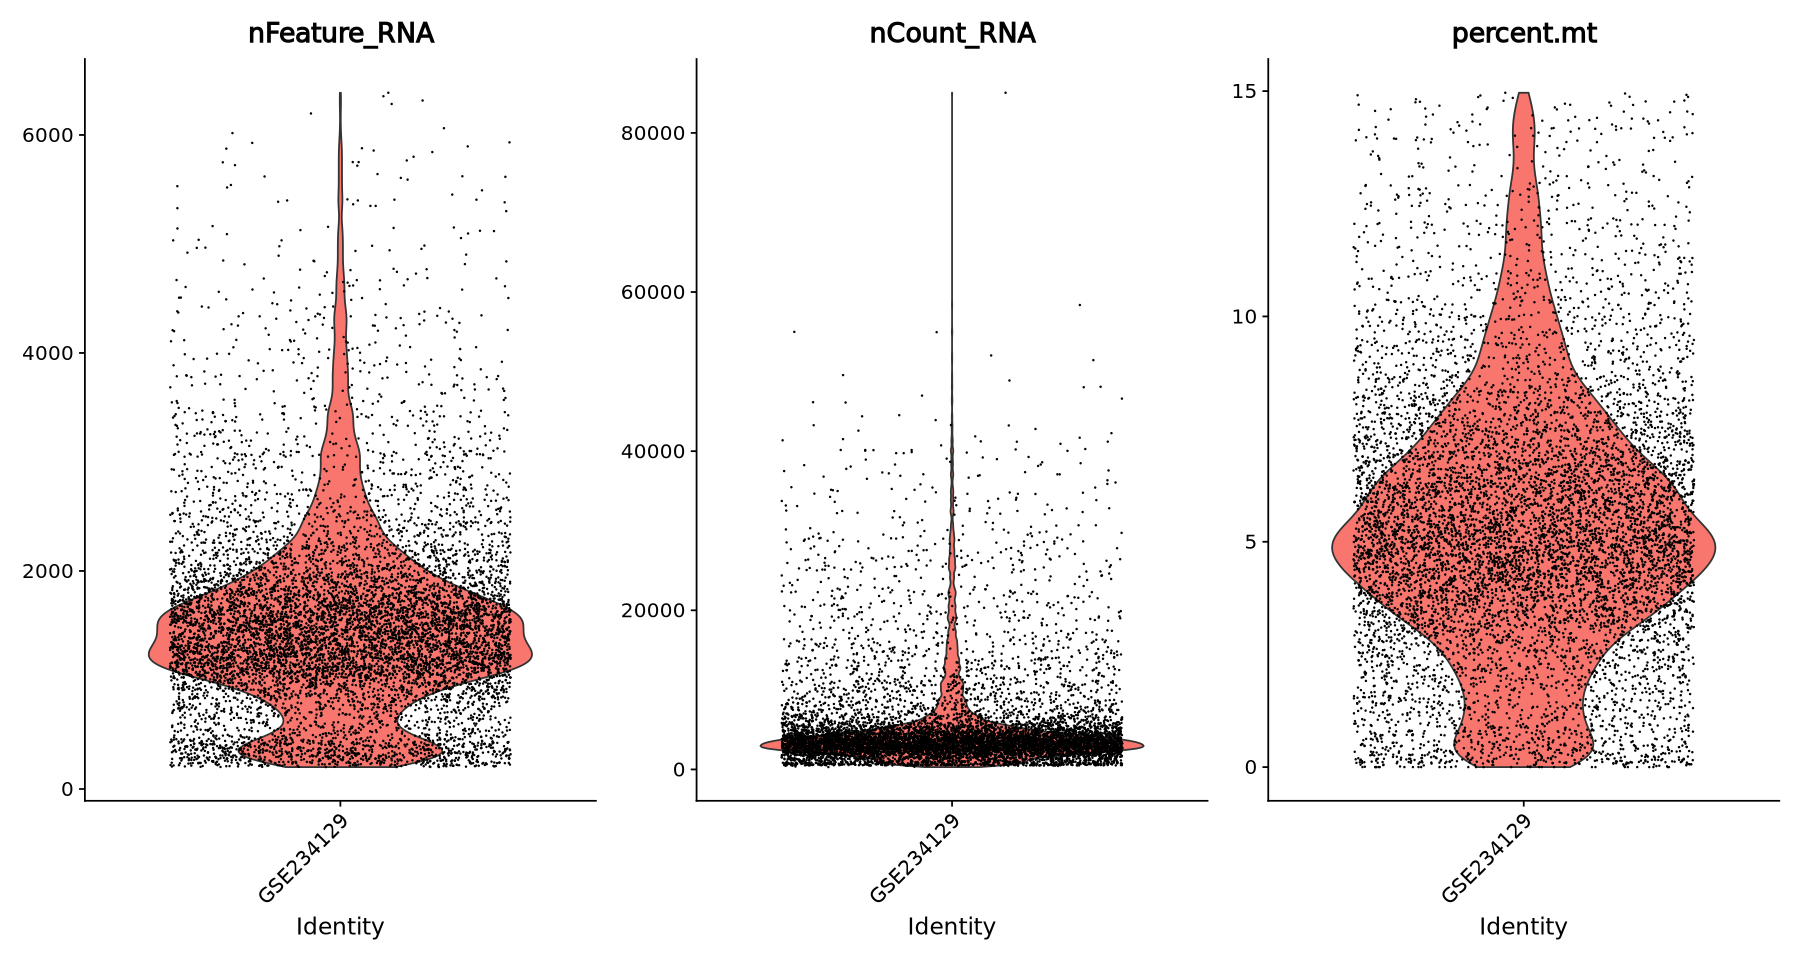

In [28]:
#QC Steps 
GAC2[["percent.mt"]] <- PercentageFeatureSet(GAC2, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(GAC2, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [32]:
#Normalise the data
GAC2 <- NormalizeData(GAC2)
#Find variable features
GAC2 <- FindVariableFeatures(GAC2, selection.method = "vst", nfeatures = 2000)
#Scale the data
GAC2 <- ScaleData(GAC2, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run PCA
GAC2 <- RunPCA(GAC2, features = VariableFeatures(object = GAC2))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Finding variable features for layer counts.1

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -1.8162”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.7559e-16”
Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for

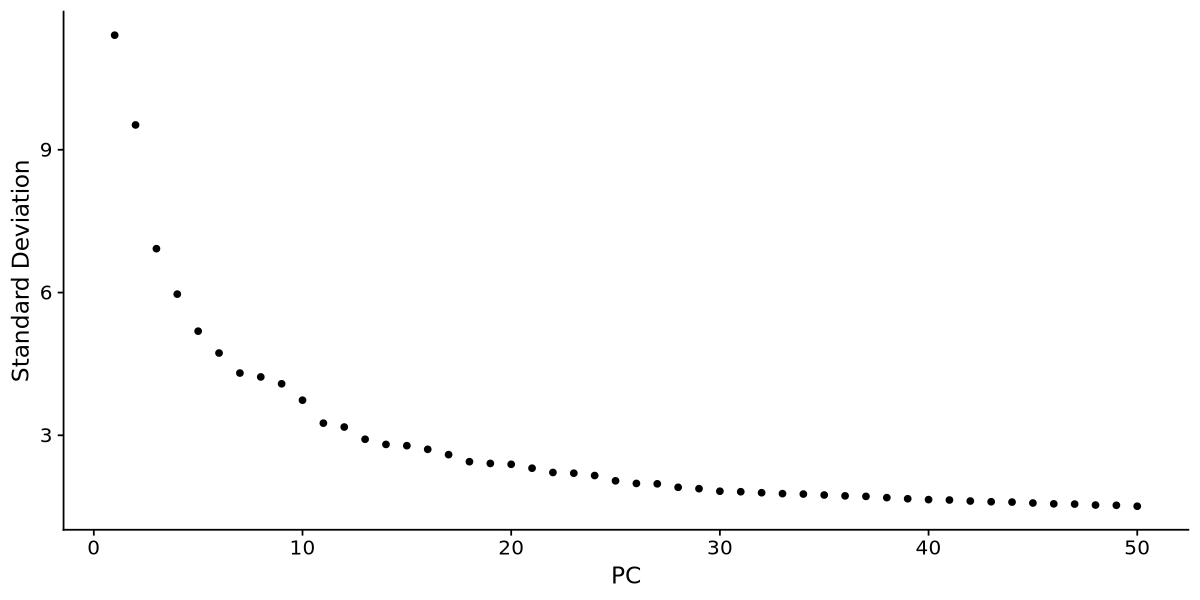

In [33]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(GAC2, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [34]:
#Find neighbours (make sure number matches no. features chosen above)
GAC2 <- FindNeighbors(GAC2, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [35]:
#Run UMAP
GAC2 <- RunUMAP(GAC2, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:05:33 UMAP embedding parameters a = 0.9922 b = 1.112

15:05:33 Read 8862 rows and found 40 numeric columns

15:05:33 Using Annoy for neighbor search, n_neighbors = 30

15:05:33 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:05:33 Writing NN index file to temp file /scratch/temp/9564059/RtmpNZnnym/file3d240b6ebce12b

15:05:33 Searching Annoy index using 1 thread, search_k = 3000

15:05:35 Annoy recall = 100%

15:05:35 Commencing smooth kNN distance calibration using 1 thread
 with t

In [36]:
#Cluster, resolution here set to 0.2
GAC2 <- FindClusters(GAC2, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 8862
Number of edges: 332040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9567
Number of communities: 11
Elapsed time: 0 seconds


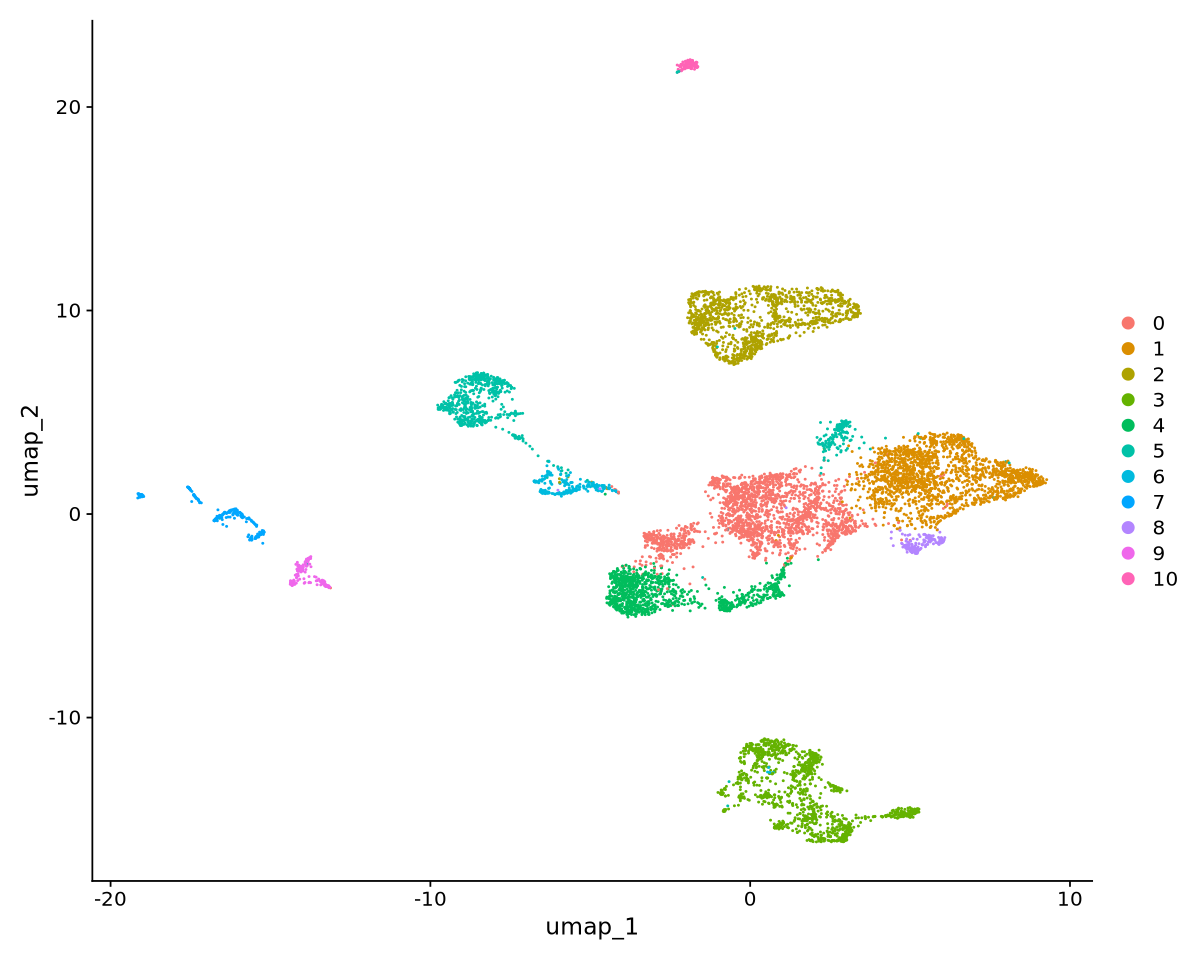

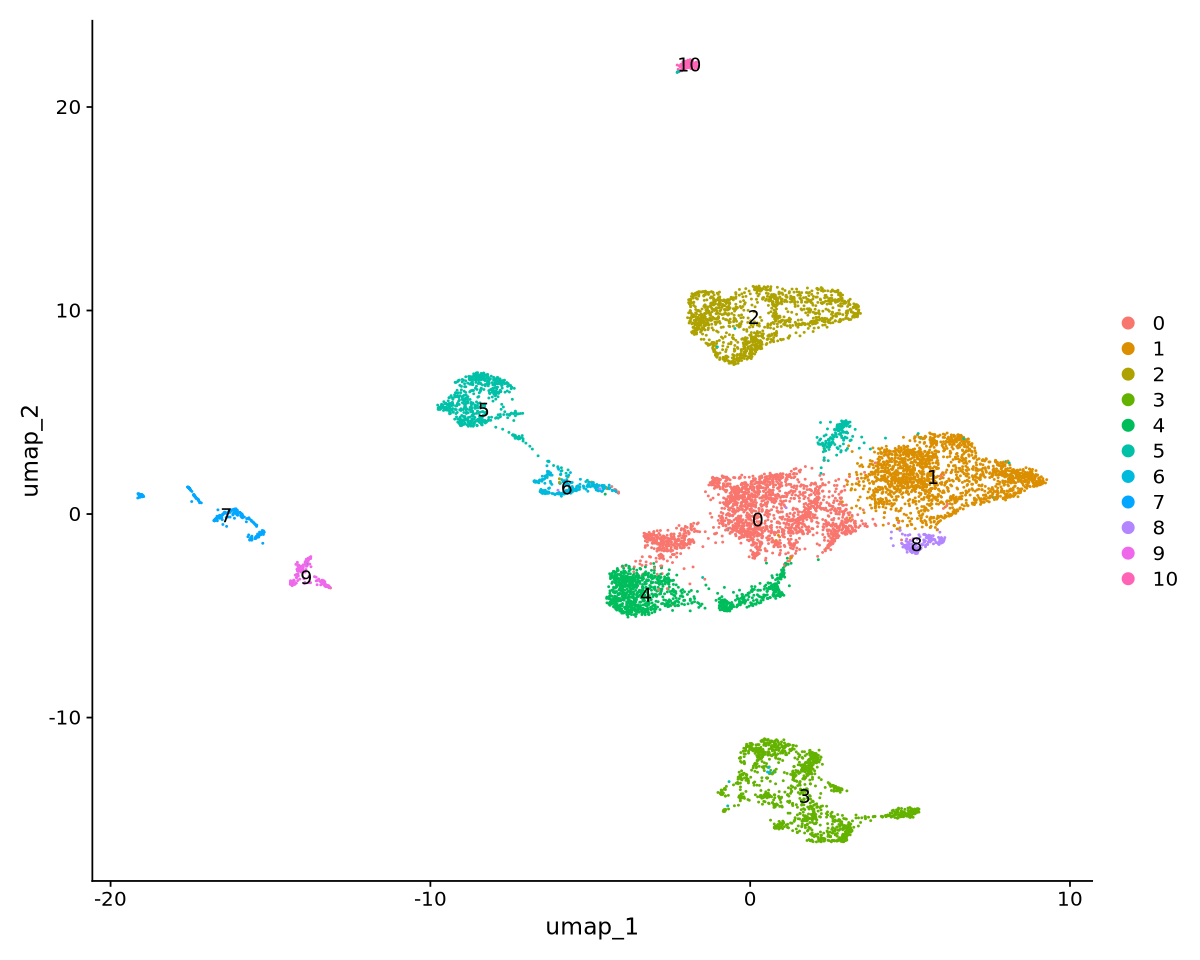

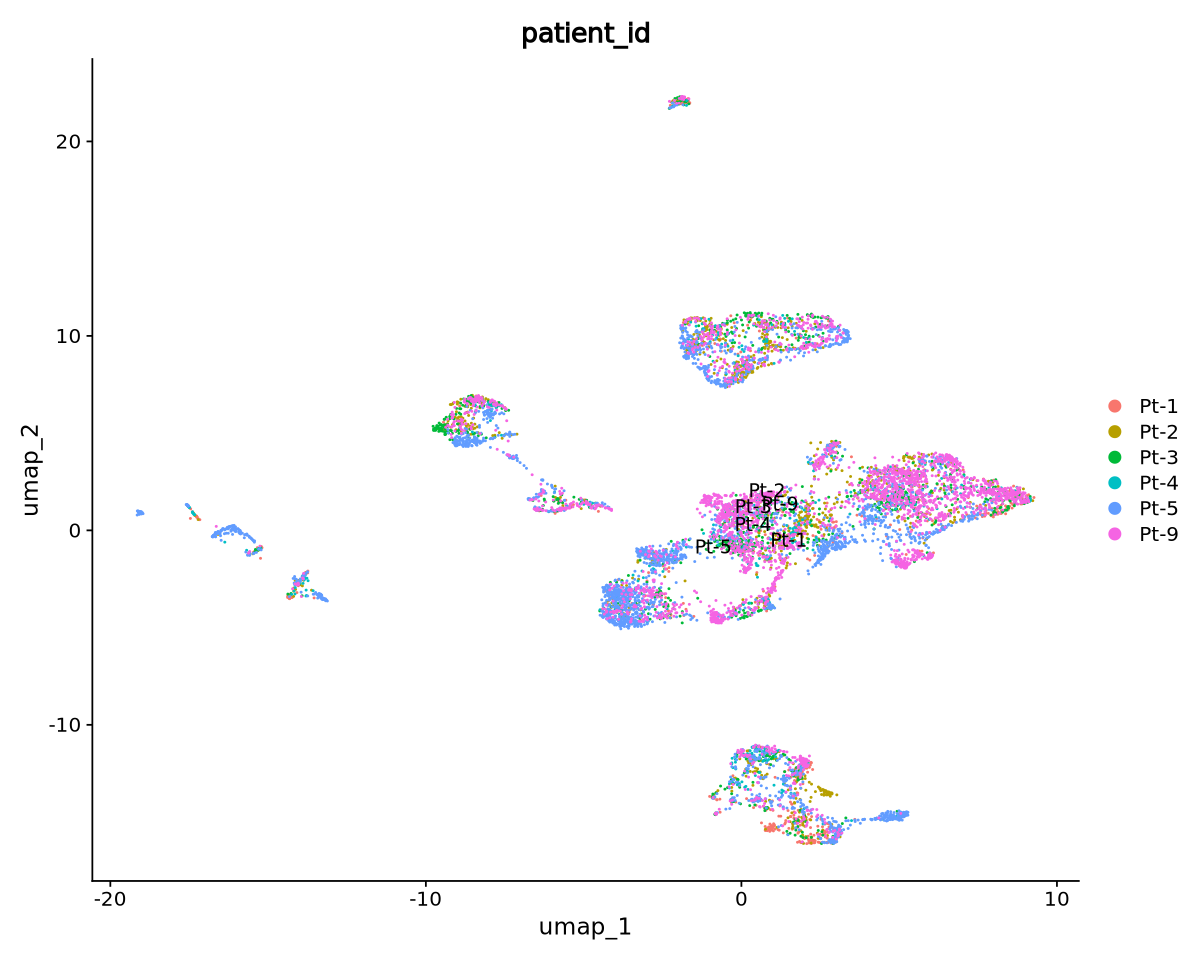

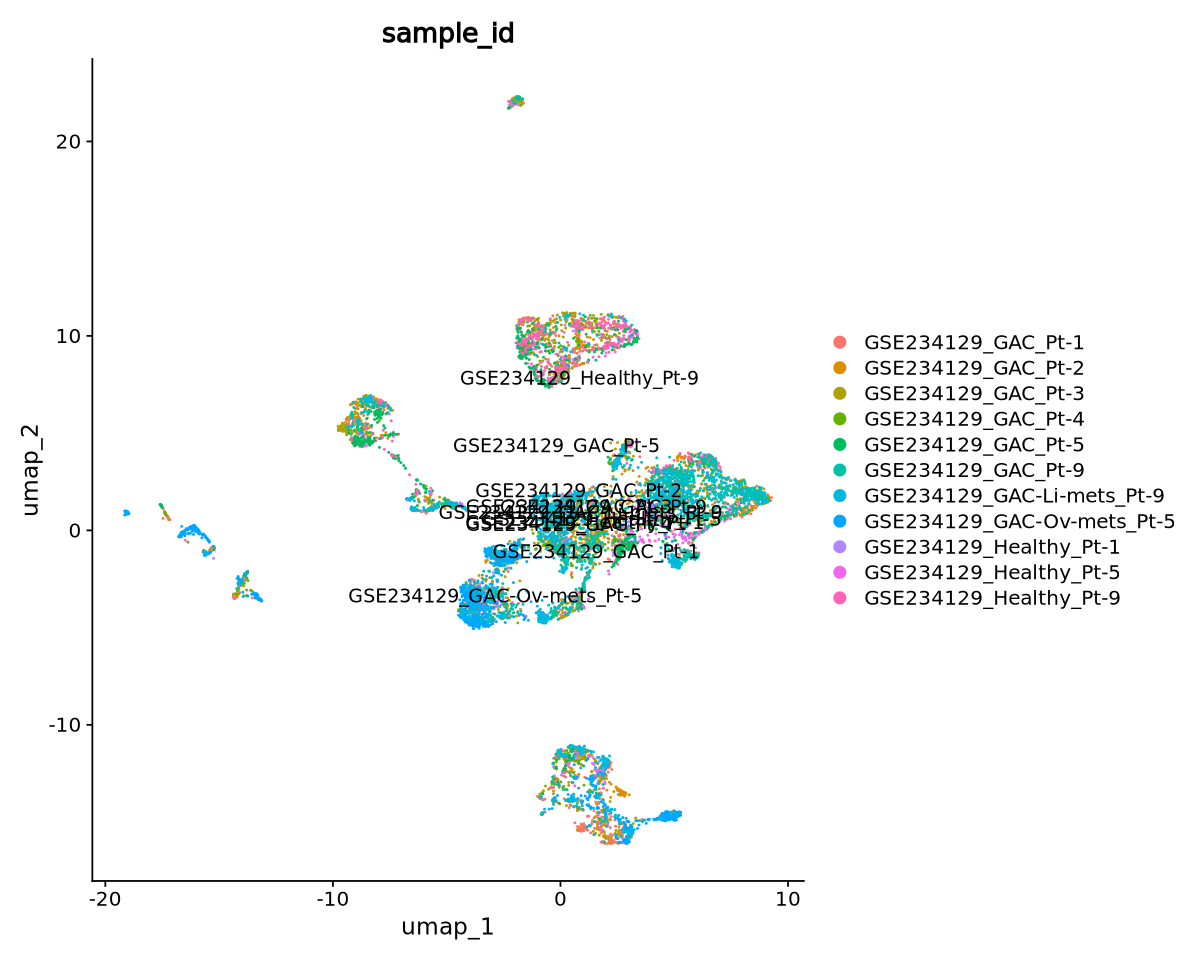

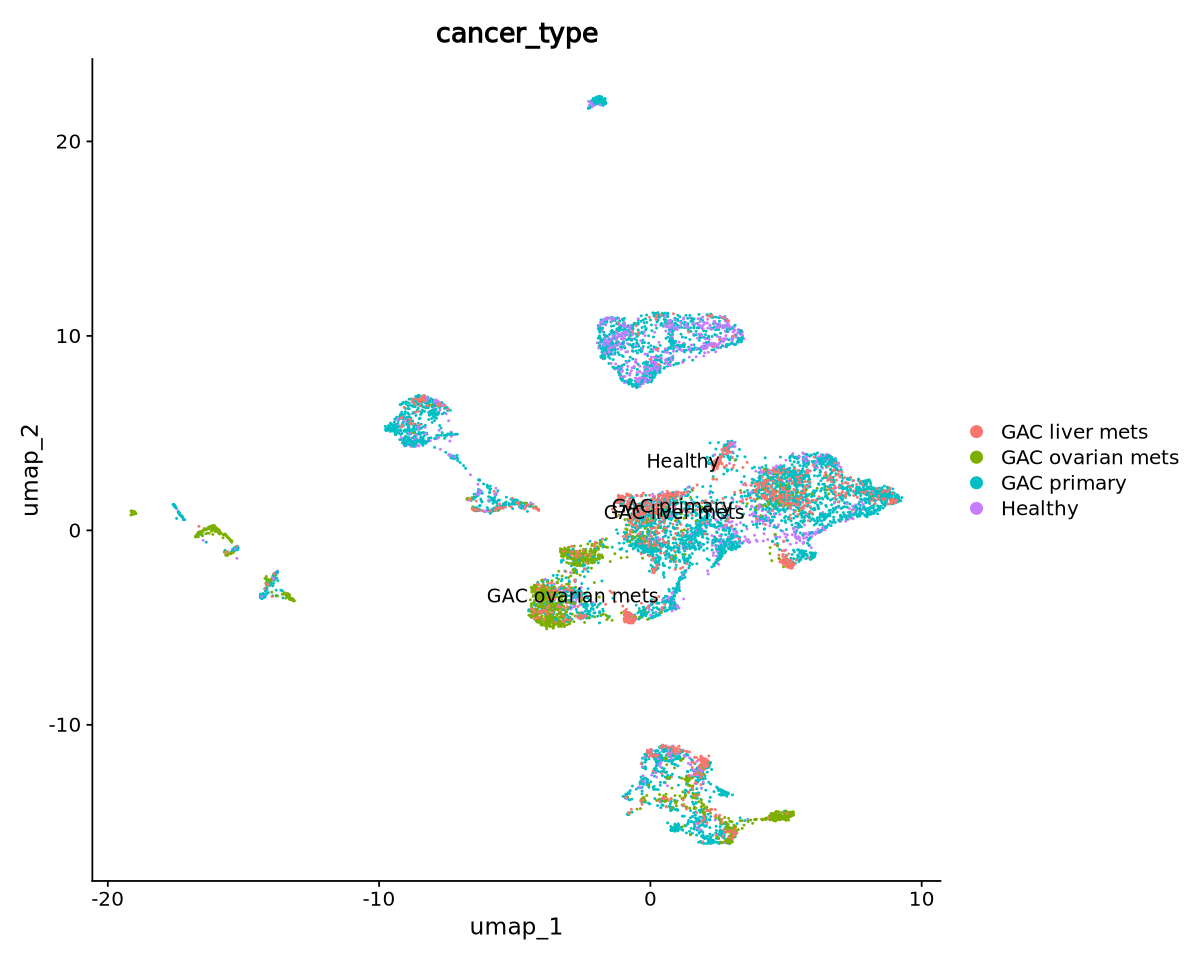

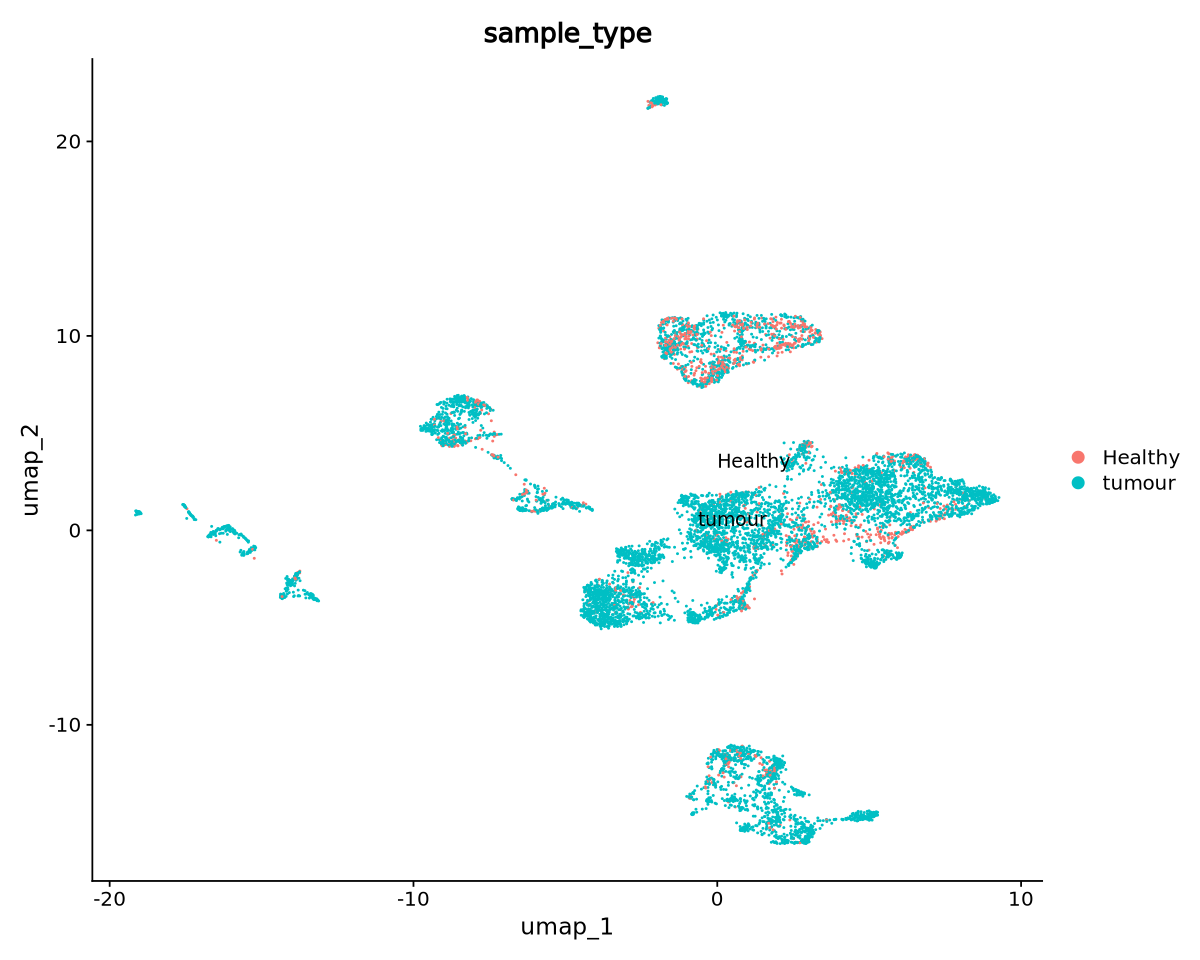

In [37]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(GAC2, reduction = "umap")
DimPlot(GAC2, reduction = "umap", label=TRUE)
DimPlot(GAC2, reduction = "umap", label=TRUE, group = "patient_id")
DimPlot(GAC2, reduction = "umap", label=TRUE, group = "sample_id")
DimPlot(GAC2, reduction = "umap", label=TRUE, group = "cancer_type")
DimPlot(GAC2, reduction = "umap", label=TRUE, group = "sample_type")

In [39]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(GAC2, file = "/scratch/user/s4436039/scdata/GSE234129/GSE234129.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

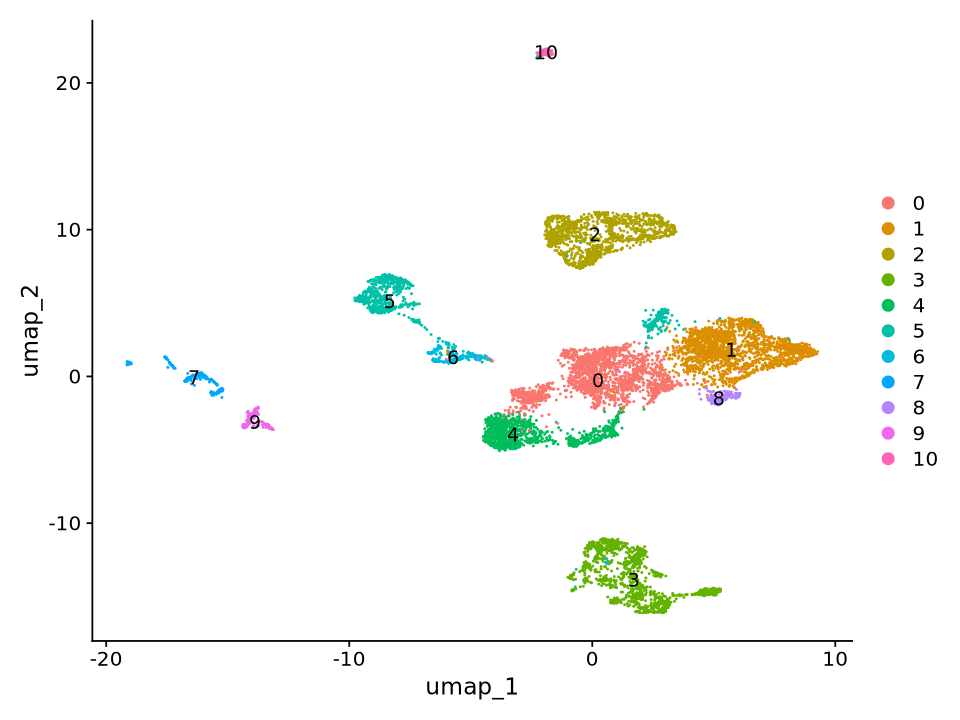

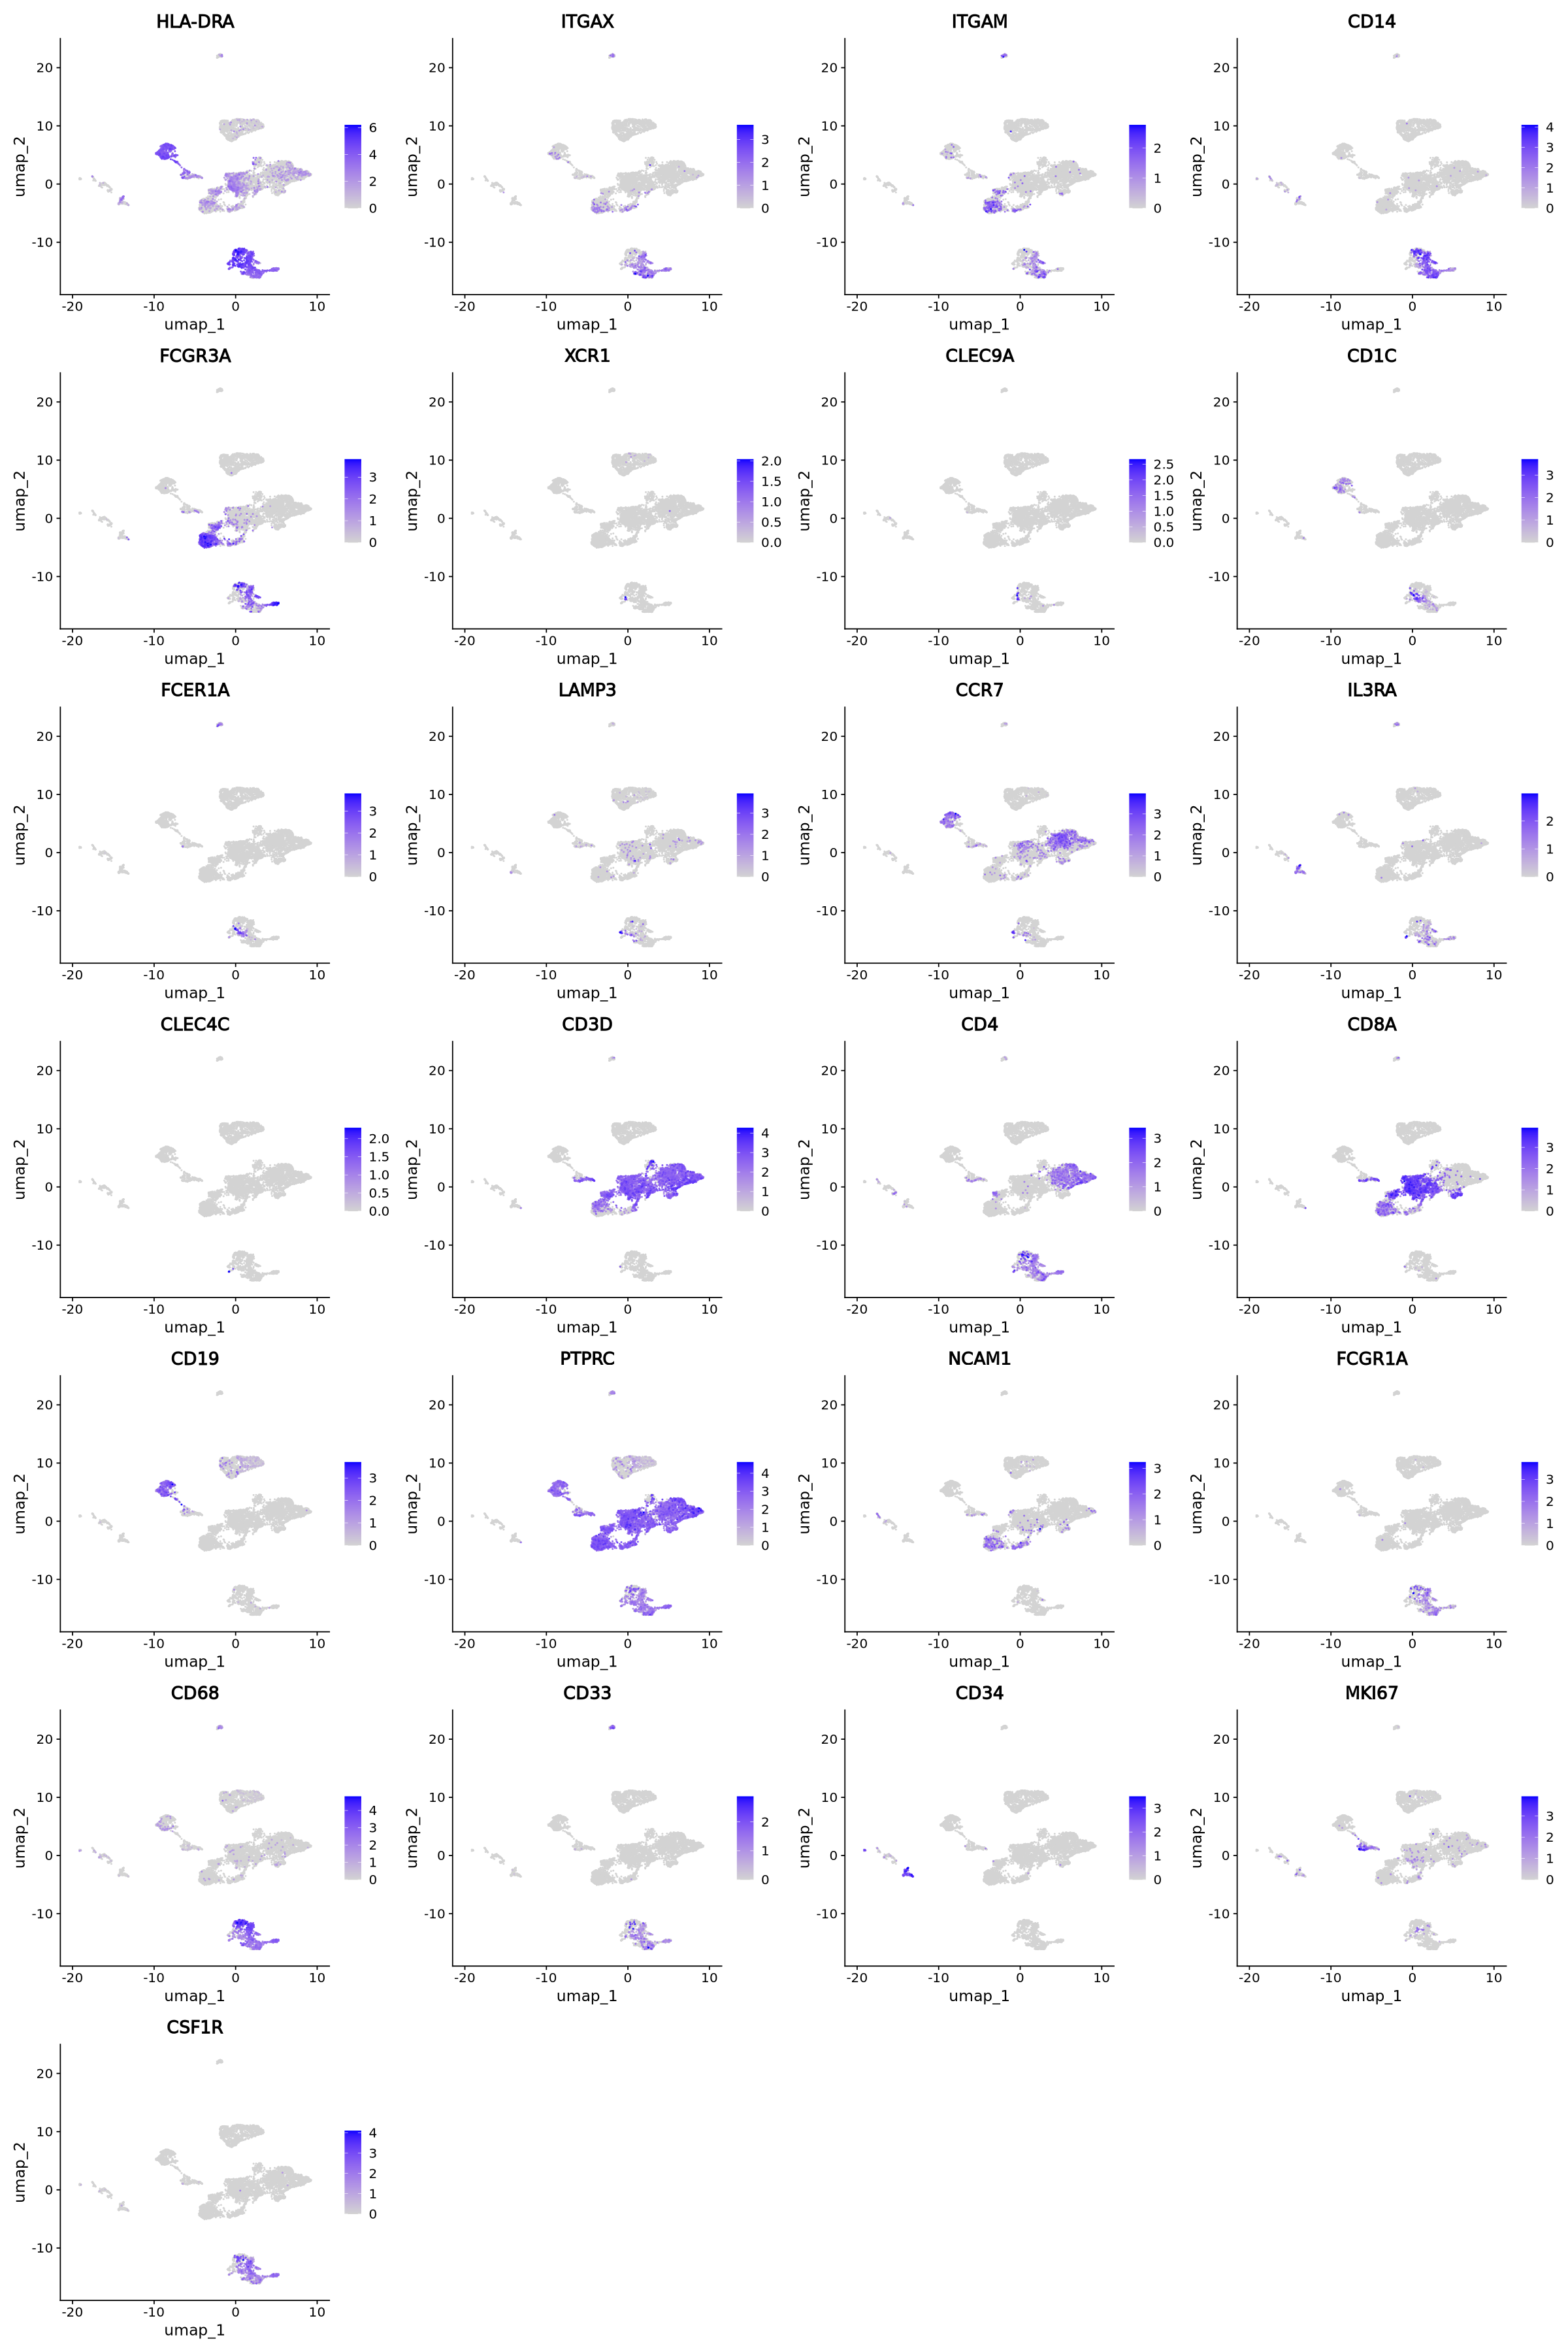

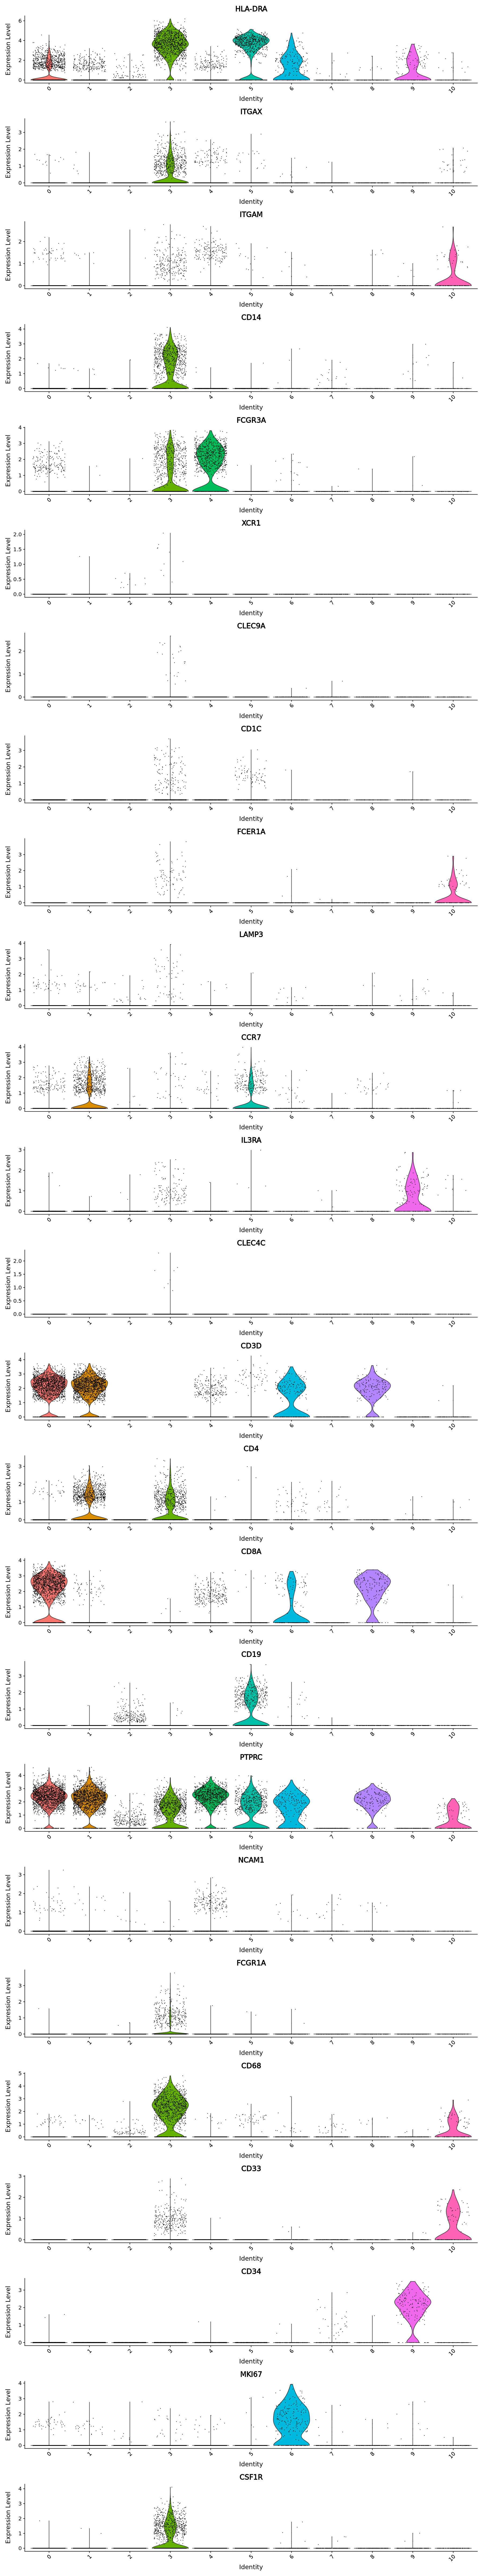

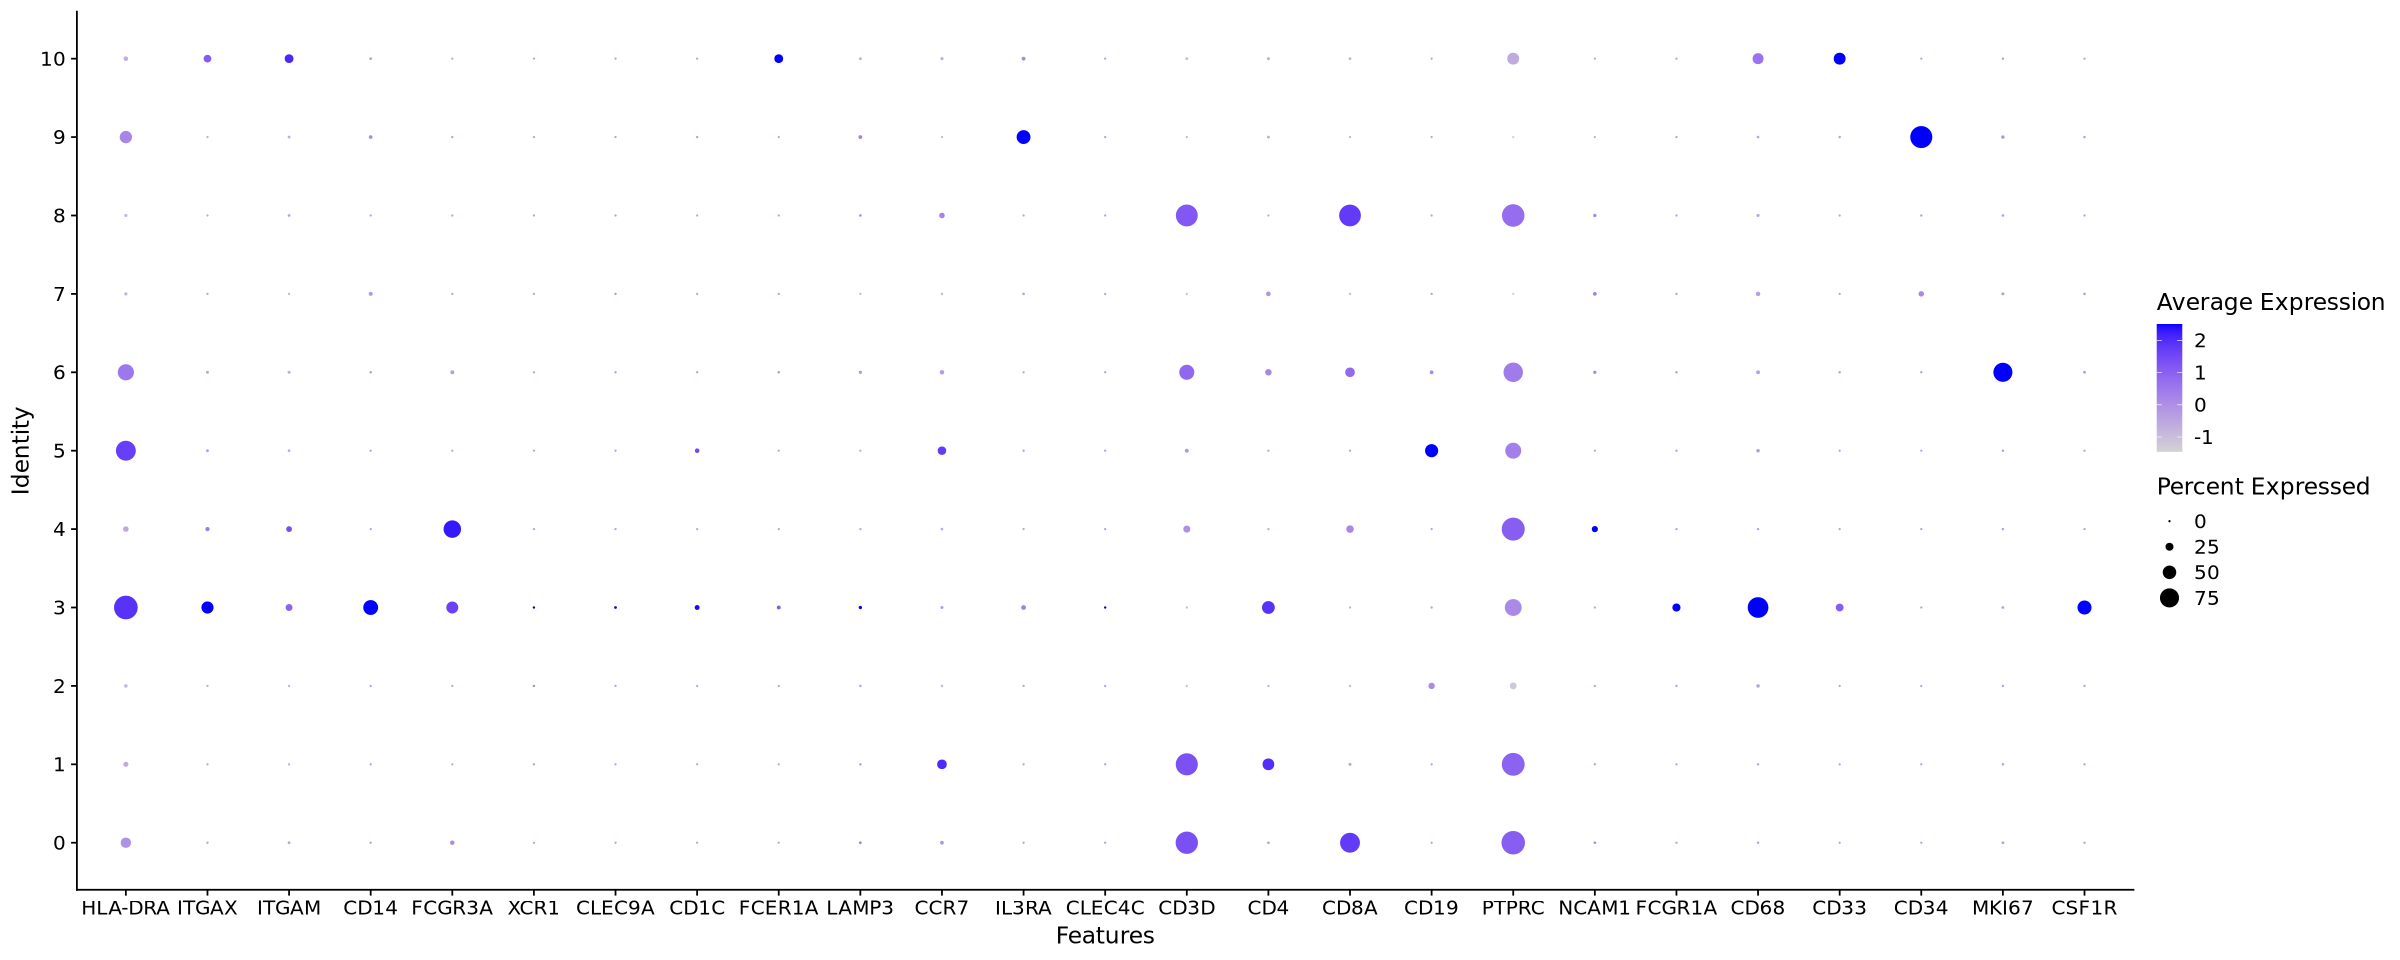

In [40]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(GAC2, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(GAC2, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(GAC2, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(GAC2, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

#### From above it looks like cluster 3 is the myeloid cells, now subsetting out this clusters

In [41]:
head(GAC2@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 GSE234129   899        492        
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 GSE234129  3355       1339        
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 GSE234129  5055       2026        
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 GSE234129  3593       1601        
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 GSE234129  2917       1340        
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 GSE234129  3979       1585        
                                       cell_barcodes            patient
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 CGGACACGTTAGATGA_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 AAAGTAGGTAGGAGTC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 AACCATGGTCGAATCT_N-QJJ-5 MDA_Pt1
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 AATCCAGCAAGTCTAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 ACAGCTACAGCTCGAC_N-QJJ-5 MDA_Pt1
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 ACCAGTATCCCTAACC_N-QJJ-5 MDA_Pt1
                                       sample     celltype sample_type
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 MDA_Pt1-Ad NK_C3    Healthy    
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 MDA_Pt1-Ad NKT      Healthy    
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 MDA_Pt1-Ad NK_C7    Healthy    
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 MDA_Pt1-Ad CD8_C2   Healthy    
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 MDA_Pt1-Ad CD8_C1   Healthy    
                                       cancer_type patient_id
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 Healthy     Pt-1      
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 Healthy     Pt-1      
                                       sample_id              percent.mt
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 GSE234129_Healthy_Pt-1  7.119021 
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 GSE234129_Healthy_Pt-1 11.147541 
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 GSE234129_Healthy_Pt-1  5.736894 
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 GSE234129_Healthy_Pt-1  5.399388 
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 GSE234129_Healthy_Pt-1  4.628043 
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 GSE234129_Healthy_Pt-1  6.207590 
                                       RNA_snn_res.0.2 seurat_clusters
GSE234129_GAC_CGGACACGTTAGATGA_N-QJJ-5 4               4              
GSE234129_GAC_AAAGTAGGTAGGAGTC_N-QJJ-5 0               0              
GSE234129_GAC_AACCATGGTCGAATCT_N-QJJ-5 4               4              
GSE234129_GAC_AATCCAGCAAGTCTAC_N-QJJ-5 0               0              
GSE234129_GAC_ACAGCTACAGCTCGAC_N-QJJ-5 0               0              
GSE234129_GAC_ACCAGTATCCCTAACC_N-QJJ-5 0               0

In [42]:
myeloid_GAC <- subset(GAC2, subset = RNA_snn_res.0.2 %in% c("3"))

In [43]:
GAC2
myeloid_GAC

An object of class Seurat 
27176 features across 8862 samples within 1 assay 
Active assay: RNA (27176 features, 2000 variable features)
 23 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, scale.data
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
27176 features across 1186 samples within 1 assay 
Active assay: RNA (27176 features, 2000 variable features)
 23 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, scale.data
 2 dimensional reductions calculated: pca, umap

In [44]:
saveRDS(myeloid_GAC, "/scratch/user/s4436039/scdata/GSE234129/GSE234129_myeloid.RDS")

#### Following the above then need to move entire GSE162025 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE234129/ /QRISdata/Q5935/nikita/scdata/GSE234129
```